# <span style="color:Red"> Bidirectional LSTM ( with stacked methodology )  </span>   

The use of multiple BiLSTM layers one after the other makes it a Stacked BiLSTM model. This structure allows the network to learn complex patterns by combining multiple layers of bidirectional LSTMs, enabling it to capture dependencies in both forward and backward directions at different levels of abstraction

### <span style="color:White"> Imporintg libraries  </span>   

In [1]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


### <span style="color:White"> Loading Data Set </span>   

In [44]:
# Load the dataset
df = pd.read_csv('../../data/mendeley_data/HateSpeechDatasetBalanced.csv')
df.head()  

,Content,Label
0,denial of normal the con be asked to comment o...,1
1,just by being able to tweet this insufferable ...,1
2,that is retarded you too cute to be single tha...,1
3,thought of a real badass mongol style declarat...,1
4,afro american basho,1


In [8]:
df

,Content,Label
0,denial of normal the con be asked to comment o...,1
1,just by being able to tweet this insufferable ...,1
2,that is retarded you too cute to be single tha...,1
3,thought of a real badass mongol style declarat...,1
4,afro american basho,1
...,...,...
726114,i mute this telecasting and played kanye west ...,1
726115,but hell yeah he s not a bachelor but looooooo...,1
726116,great video musician but s not my musician lol...,1
726117,not great pop video yeah he s not a pedophile ...,1


### <span style="color:White">Preparing the DataSet </span>   

In [7]:
# Preprocess data
tweets = df['Content'].values
labels = df['Label'].values

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(tweets)
sequences = tokenizer.texts_to_sequences(tweets)
padded_sequences = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

### <span style="color:White">  Bilstm model Definition with initial summary  </span>   

In [9]:
# Define the model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


d:\AnaConda\envs\project\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### <span style="color:White">Training the model </span>   

In [11]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)


Epoch 1/20
14523/14523 ━━━━━━━━━━━━━━━━━━━━ 1634s 113ms/step - accuracy: 0.8187 - loss: 0.3979 - val_accuracy: 0.8422 - val_loss: 0.3472
Epoch 2/20
14523/14523 ━━━━━━━━━━━━━━━━━━━━ 1919s 132ms/step - accuracy: 0.8516 - loss: 0.3298 - val_accuracy: 0.8523 - val_loss: 0.3242
Epoch 3/20
14523/14523 ━━━━━━━━━━━━━━━━━━━━ 2022s 139ms/step - accuracy: 0.8695 - loss: 0.2937 - val_accuracy: 0.8567 - val_loss: 0.3218
Epoch 4/20
14523/14523 ━━━━━━━━━━━━━━━━━━━━ 3086s 212ms/step - accuracy: 0.8849 - loss: 0.2637 - val_accuracy: 0.8612 - val_loss: 0.3154
Epoch 5/20
14523/14523 ━━━━━━━━━━━━━━━━━━━━ 1528s 105ms/step - accuracy: 0.8990 - loss: 0.2373 - val_accuracy: 0.8613 - val_loss: 0.3193
Epoch 6/20
14523/14523 ━━━━━━━━━━━━━━━━━━━━ 1551s 107ms/step - accuracy: 0.9084 - loss: 0.2158 - val_accuracy: 0.8644 - val_loss: 0.3238
Epoch 7/20
14523/14523 ━━━━━━━━━━━━━━━━━━━━ 1565s 108ms/step - accuracy: 0.9179 - loss: 0.1961 - val_accuracy: 0.8632 - val_loss: 0.3267
Epoch 8/20
14523/14523 ━━━━━━━━━━━━━━━━━━

### <span style="color:White">Evaluation of model </span>   

In [12]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

y_pred = (model.predict(X_test) > 0.5).astype("int32")


print(classification_report(y_test, y_pred))


4539/4539 ━━━━━━━━━━━━━━━━━━━━ 182s 40ms/step - accuracy: 0.8609 - loss: 0.4621
Test Loss: 0.4672866761684418
Test Accuracy: 0.85982346534729
4539/4539 ━━━━━━━━━━━━━━━━━━━━ 215s 47ms/step
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     72043
           1       0.86      0.86      0.86     73181

    accuracy                           0.86    145224
   macro avg       0.86      0.86      0.86    145224
weighted avg       0.86      0.86      0.86    145224



### <span style="color:White">Loading model as file </span>   

In [13]:
# Save the model
model.save('bilstm_hate_speech_model_mendeley_dataset.h5')


### <span style="color:White">Summary after training </span>   

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 100, 128)       │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,340,293 (8.93 MB)

 Trainable params: 780,097 (2.98 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,560,196 (5.95 MB)

# <span style="color:Red"> Fine Tune  </span>   

In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense, Input
import tensorflow as tf

# Load the dataset
data = pd.read_csv("../../data/mendeley_data/HateSpeechDatasetBalanced.csv")

# Assuming the CSV has columns 'Content' and 'Label'
texts = data['Content'].tolist()
labels = data['Label'].tolist()

# Split data into training, validation, and test sets
train_texts, temp_texts, train_labels, temp_labels = train_test_split(texts, labels, test_size=0.4, random_state=42)
val_texts, test_texts, val_labels, test_labels = train_test_split(temp_texts, temp_labels, test_size=0.5, random_state=42)

# Load the pre-trained model
fine_tuned_model = load_model('bilstm_hate_speech_model_mendeley_dataset.h5')

# Get the embedding layer to check its input dimension (vocabulary size)
embedding_layer = fine_tuned_model.layers[0]
vocab_size = embedding_layer.input_dim
print(f"Vocabulary size of the embedding layer: {vocab_size}")

# Tokenize the data with a limit on the number of words to match the embedding layer's vocabulary size
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train_texts)

train_sequences = tokenizer.texts_to_sequences(train_texts)
val_sequences = tokenizer.texts_to_sequences(val_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

max_len = 100
train_data = pad_sequences(train_sequences, maxlen=max_len)
val_data = pad_sequences(val_sequences, maxlen=max_len)
test_data = pad_sequences(test_sequences, maxlen=max_len)

# Create a label map for categorical conversion
label_map = {label: index for index, label in enumerate(set(labels))}
num_classes = len(label_map)

# Convert labels to categorical format
def convert_labels(labels, label_map):
    return to_categorical([label_map[label] for label in labels], num_classes=num_classes)

train_labels = convert_labels(train_labels, label_map)
val_labels = convert_labels(val_labels, label_map)
test_labels = convert_labels(test_labels, label_map)

# Print the shapes of the input and output data
print(f"Shape of train_data: {train_data.shape}")
print(f"Shape of train_labels: {train_labels.shape}")
print(f"Shape of val_data: {val_data.shape}")
print(f"Shape of val_labels: {val_labels.shape}")

# Get the layers from the sequential model
bidirectional_layer_1 = fine_tuned_model.layers[1]
dropout_layer_1 = fine_tuned_model.layers[2]
bidirectional_layer_2 = fine_tuned_model.layers[3]
dropout_layer_2 = fine_tuned_model.layers[4]

# Define the functional model
input_tensor = Input(shape=(max_len,))
x = embedding_layer(input_tensor)
x = bidirectional_layer_1(x)
x = dropout_layer_1(x)
x = bidirectional_layer_2(x)
x = dropout_layer_2(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
output_tensor = Dense(num_classes, activation='softmax')(x)

# Create a new model
fine_tune_model = Model(inputs=input_tensor, outputs=output_tensor)

# Unfreeze some layers for fine-tuning
for layer in fine_tune_model.layers[:-3]:  # Unfreeze last 3 layers
    layer.trainable = True

# Recompile the model with a lower learning rate
fine_tune_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_fine_tune_2 = fine_tune_model.fit(train_data, train_labels, epochs=10, validation_data=(val_data, val_labels))

# Save the fine-tuned model
fine_tune_model.save('fine_tuned_bilstm_hate_speech_model.h5')


Vocabulary size of the embedding layer: 5000
Shape of train_data: (435671, 100)
Shape of train_labels: (435671, 2)
Shape of val_data: (145224, 100)
Shape of val_labels: (145224, 2)
Epoch 1/10
13615/13615 ━━━━━━━━━━━━━━━━━━━━ 2414s 177ms/step - accuracy: 0.5199 - loss: 0.6950 - val_accuracy: 0.5618 - val_loss: 0.6791
Epoch 2/10
13615/13615 ━━━━━━━━━━━━━━━━━━━━ 1811s 133ms/step - accuracy: 0.5542 - loss: 0.6812 - val_accuracy: 0.5680 - val_loss: 0.6759
Epoch 3/10
13615/13615 ━━━━━━━━━━━━━━━━━━━━ 1794s 132ms/step - accuracy: 0.5641 - loss: 0.6777 - val_accuracy: 0.5731 - val_loss: 0.6736
Epoch 4/10
13615/13615 ━━━━━━━━━━━━━━━━━━━━ 1734s 127ms/step - accuracy: 0.5733 - loss: 0.6750 - val_accuracy: 0.5782 - val_loss: 0.6714
Epoch 5/10
13615/13615 ━━━━━━━━━━━━━━━━━━━━ 1704s 125ms/step - accuracy: 0.5771 - loss: 0.6732 - val_accuracy: 0.5825 - val_loss: 0.6695
Epoch 6/10
13615/13615 ━━━━━━━━━━━━━━━━━━━━ 1712s 126ms/step - accuracy: 0.5836 - loss: 0.6699 - val_accuracy: 0.5873 - val_loss: 0.66

In [100]:
fine_tuned_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 100, 128)       │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 780,099 (2.98 MB)

 Trainable params: 780,097 (2.98 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

4539/4539 ━━━━━━━━━━━━━━━━━━━━ 191s 42ms/step


d:\AnaConda\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\AnaConda\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix:
[[72057     0]
 [73167     0]]

Classification Report:


d:\AnaConda\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\AnaConda\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.50      1.00      0.66     72057
           1       0.00      0.00      0.00     73167

    accuracy                           0.50    145224
   macro avg       0.25      0.50      0.33    145224
weighted avg       0.25      0.50      0.33    145224

Precision: 0.2462
Recall: 0.4962
F1 Score: 0.3291


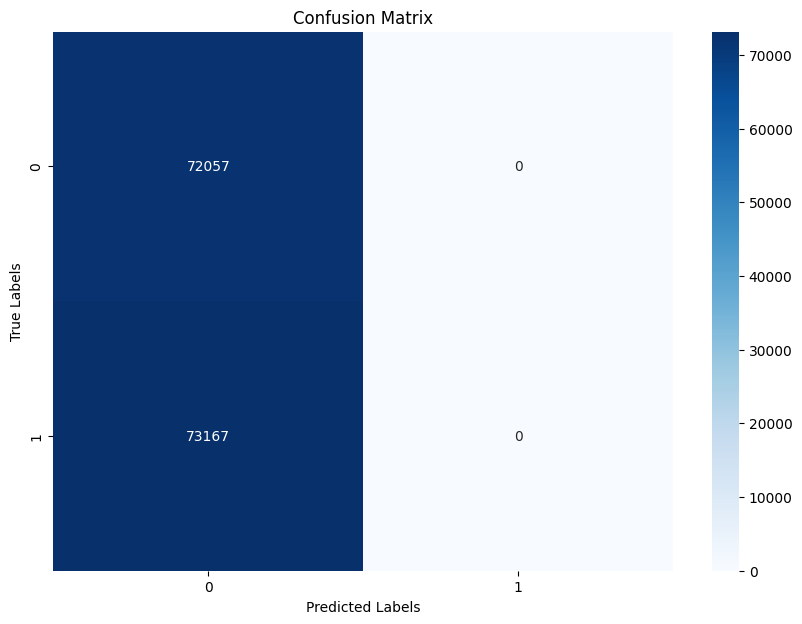

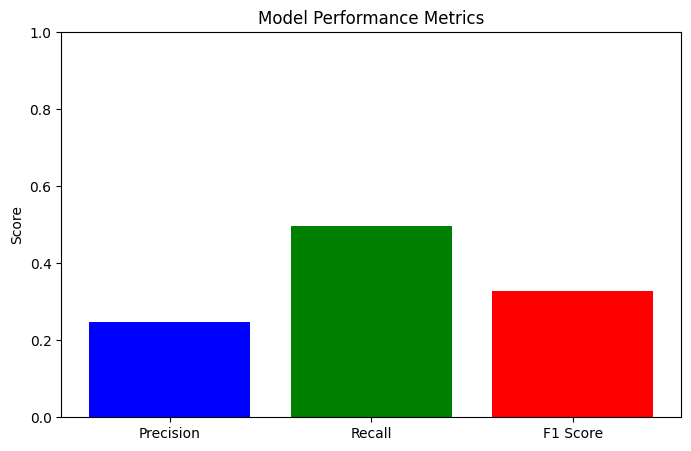

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Make predictions on the test data
y_pred_prob = fine_tuned_model.predict(test_data)
y_pred_classes = np.argmax(y_pred_prob, axis=1)

# Convert test labels from categorical to original class labels
y_true_classes = np.argmax(test_labels, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Compute precision, recall, and F1 score
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

# Print the results
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes))
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plotting precision, recall, and F1 score
metrics = {
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'red'])
plt.ylim(0, 1)
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.show()


Comparison and Interpretation:
Accuracy:

First Set: 0.86
Second Set: 0.50
The first set clearly shows a higher accuracy, indicating better overall performance.

Precision, Recall, and F1-Score:

First Set:
Balanced precision, recall, and f1-score across both classes at 0.86.
Second Set:
Precision, recall, and f1-score for class 1 are all 0.00, which is very poor.
Class 0 has a recall of 1.00 but a precision of 0.50, leading to an f1-score of 0.66.
Macro and Weighted Averages:

First Set: All values (precision, recall, f1-score) are 0.86.
Second Set: All values are significantly lower, with the highest being 0.50 for recall.